Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
hr_df = pd.read_csv('HR_comma_sep.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
hr_df.groupby(['Department','salary','left']). mean()

satisfaction_level  last_evaluation  number_project  \
Department  salary left                                                        
IT          high   0               0.641013         0.716709        3.886076   
                   1               0.582500         0.715000        3.500000   
            low    0               0.681648         0.711831        3.743707   
                   1               0.428314         0.725407        3.924419   
            medium 0               0.679224         0.713607        3.746575   
                   1               0.375670         0.738866        4.226804   
RandD       high   0               0.607021         0.708936        3.851064   
                   1               0.347500         0.602500        2.750000   
            low    0               0.651294         0.711650        3.792880   
                   1               0.470182         0.728364        3.872727   
            medium 0               0.663387         0.700097        3.848387   
                   1               0.405161         0.769677        4.241935   
accounting  high   0               0.635217         0.734928        3.985507   
                   1               0.322000         0.582000        2.800000   
            low    0               0.643282         0.726718        3.795367   
                   1               0.393333         0.680303        3.818182   
            medium 0               0.655064         0.722894        3.770213   
                   1               0.415800         0.714200        3.980000   
hr          high   0               0.735897         0.756923        3.871795   
                   1               0.265000         0.658333        4.000000   
            low    0               0.658560         0.726708        3.740741   
                   1               0.476848         0.694348        3.565217   
            medium 0               0.663678         0.709050        3.636364   
                   1               0.407863         0.669316        3.495726   
management  high   0               0.654375         0.714688        3.767857   
                   1               0.420000         0.970000        6.000000   
            low    0               0.680496         0.724628        3.801653   
                   1               0.467627         0.688644        3.728814   
            medium 0               0.639433         0.732835        3.871134   
                   1               0.337742         0.792903        4.870968   
marketing   high   0               0.628310         0.681408        3.605634   
                   1               0.423333         0.523333        2.000000   
            low    0               0.675833         0.736993        3.775362   
                   1               0.443175         0.706984        3.698413   
            medium 0               0.674123         0.720649        3.698052   
                   1               0.475588         0.686618        3.573529   
product_mng high   0               0.641935         0.669032        3.741935   
                   1               0.326667         0.631667        3.333333   
            low    0               0.661908         0.718497        3.745665   
                   1               0.485810         0.750000        4.085714   
            medium 0               0.657905         0.712061        3.864865   
                   1               0.487126         0.704828        3.597701   
sales       high   0               0.660039         0.695804        3.807843   
                   1               0.447143         0.772857        4.785714   
            low    0               0.669365         0.707817        3.781027   
                   1               0.462999         0.712123        3.711621   
            medium 0               0.669244         0.712893        3.793737   
                   1               0.412409         0.706370        3.745875   
support     high   0     

In [5]:
len(hr_df[hr_df.duplicated()])

3008

In [6]:
hr_df = hr_df.drop_duplicates()
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
len(hr_df[hr_df.duplicated()])

0

Data Visualization

Plot bar charts showing impact of employee salaries on retention

<AxesSubplot:xlabel='salary', ylabel='count'>

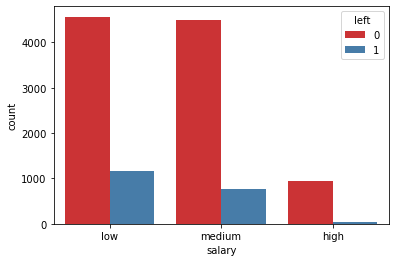

In [8]:
sns.countplot(x = 'salary' ,hue ='left' ,palette = "Set1" , data= hr_df)

Plot bar charts showing corelation between department and employee retention

<AxesSubplot:xlabel='Department', ylabel='count'>

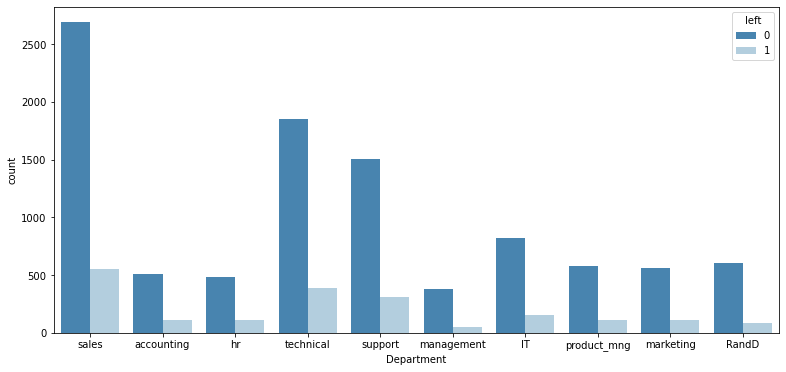

In [9]:
plt.figure(figsize = (13, 6))
sns.countplot(x = 'Department' ,hue ='left' ,palette = 'Blues_r' , data= hr_df)

<AxesSubplot:>

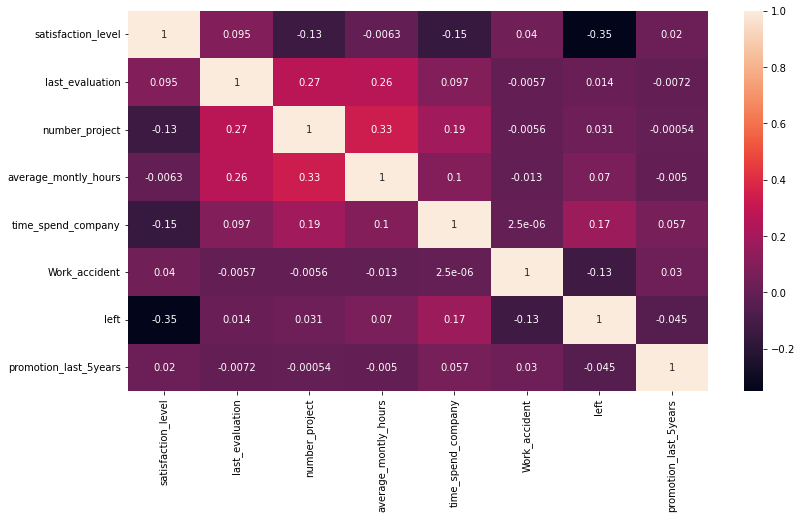

In [10]:
plt.figure(figsize = (13, 7))
sns.heatmap(hr_df.corr(), annot = True)

In [14]:
#Train/test Split
